In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[ 1.3174682 , -1.72186736],
       [ 1.26056862, -0.83594696],
       [ 1.1110735 , -1.86109743],
       ...,
       [-2.85792575, -0.08251854],
       [-0.53132023, -0.02520888],
       [-0.90985821,  1.85565124]])

In [5]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

<Axes: xlabel='0', ylabel='1'>

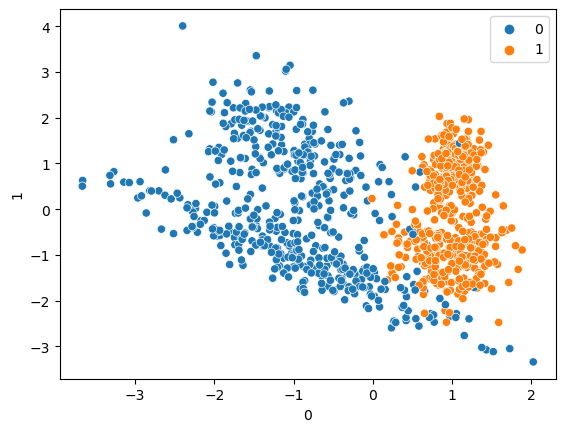

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVC

In [13]:
svc=SVC(kernel='linear')

In [14]:
svc.fit(Xtr,ytr)

SVC(kernel='linear')

In [15]:
svc.coef_

array([[2.56452615, 0.3680841 ]])

In [16]:
y_pred=svc.predict(Xte)

In [17]:
from sklearn.metrics import accuracy_score as acs, confusion_matrix as cm, classification_report as cr

In [18]:
print(acs(y_pred,yte))

0.952


In [19]:
print(cm(y_pred,yte))

[[107   4]
 [  8 131]]


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
params={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [30]:
grid=GridSearchCV(estimator=svc,param_grid=params,cv=5,verbose=3)

In [31]:
grid.fit(Xtr,ytr)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.973 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.947 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.940 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.933 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.973 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.947 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.940 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.933 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [32]:
grid.best_params_

{'C': 0.1, 'gamma': 1}